In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
city_df = pd.DataFrame(pd.read_csv("city_data.csv"))
ride_df = pd.DataFrame(pd.read_csv("ride_data.csv"))
print(city_df.head())
print(ride_df.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [3]:
merged = ride_df.merge(city_df, how='left', on='city')
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
city_group = pd.DataFrame(ride_df.groupby("city")["fare"].agg(['mean','count', 'sum']))
city_group.head()

,mean,count,sum
city,,,
Amandaburgh,24.641667,18,443.55
Barajasview,25.332273,22,557.31
Barronchester,36.422500,16,582.76
Bethanyland,32.956111,18,593.21
Bradshawfurt,40.064000,10,400.64


In [5]:
city_named = city_group.rename(columns={"mean" : "Average Fare per City", 
                                        "count" : "Ride Count per City",
                                       "sum" : "Total Fare Spent"})
city_named.head()

,Average Fare per City,Ride Count per City,Total Fare Spent
city,,,
Amandaburgh,24.641667,18,443.55
Barajasview,25.332273,22,557.31
Barronchester,36.422500,16,582.76
Bethanyland,32.956111,18,593.21
Bradshawfurt,40.064000,10,400.64


In [6]:
ride_stats = city_named.merge(city_df, how='left', on='city')
ride_stats.head()

,city,Average Fare per City,Ride Count per City,Total Fare Spent,driver_count,type
0,Amandaburgh,24.641667,18,443.55,12,Urban
1,Barajasview,25.332273,22,557.31,26,Urban
2,Barronchester,36.422500,16,582.76,11,Suburban
3,Bethanyland,32.956111,18,593.21,22,Suburban
4,Bradshawfurt,40.064000,10,400.64,7,Rural


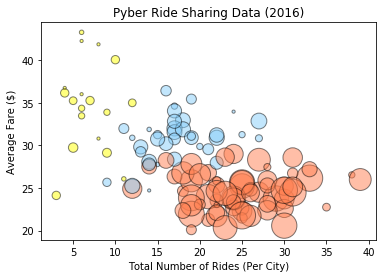

In [54]:
#### BUBBLE PLOT ####
tot_rides = ride_stats["Ride Count per City"]
avg_fare = ride_stats["Average Fare per City"]
driver_count = ride_stats["driver_count"]
color = ride_stats["type"]

colors = {'Urban':'coral', 'Suburban':'lightskyblue', 'Rural' : 'yellow'}

plt.scatter(tot_rides, avg_fare, marker="o", edgecolors="black",
            s=driver_count*10, alpha=0.5, c=ride_stats['type'].apply(lambda x: colors[x]))
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.show()

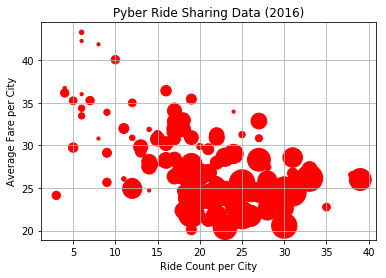

In [8]:
#city_type = ['Urban','Suburban','Rural']
ride_stats.plot(kind="scatter", x="Ride Count per City", y="Average Fare per City", 
               s=ride_stats.driver_count*10, c = 'red',
                grid=True, title="Pyber Ride Sharing Data (2016)")

plt.show()

In [10]:
#### PIE CHARTS ####
type_group = ride_stats.groupby("type")['Total Fare Spent','Ride Count per City',
                                         'driver_count'].sum()
type_group

,Total Fare Spent,Ride Count per City,driver_count
type,,,
Rural,4327.93,125,78
Suburban,19356.33,625,490
Urban,39854.38,1625,2405


In [46]:
# Pie chart settings, same for all charts
types = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "salmon"]

explode = (0, 0, 0.15)

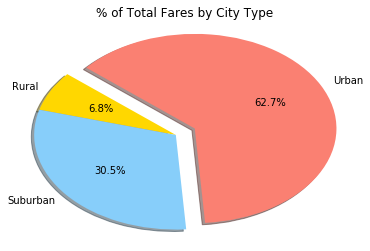

In [47]:
fares = type_group['Total Fare Spent']

plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("normal")
plt.show()

# plt.savefig("../Images/PyberPieFare.png")

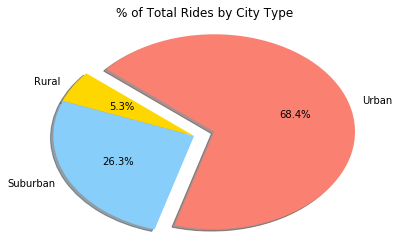

In [48]:
# The values of each section of the pie chart
rides = type_group['Ride Count per City']

plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("normal")
plt.show()

# plt.savefig("../Images/PyberPieRide.png")

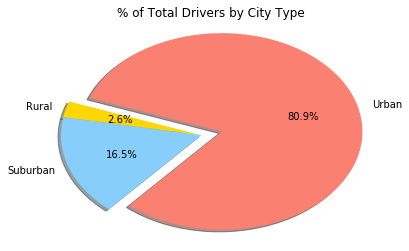

In [49]:
drivers = type_group['driver_count']

plt.pie(drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis("normal")
plt.show()

# plt.savefig("../Images/PyberPieDrive.png")